Diabetes Prediction Model

In [1]:
#dataset in the CSV format for load the data
import pandas as pd
diabetes_data=pd.read_csv(r"C:\Users\HP\Desktop\Subhajit_Data Sc_py\diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [2]:
#Get the information about the dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [3]:
#For know more about the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
#Now check if our dataset have NULL values or not
diabetes_data.isnull().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [5]:
#Check the number of null values our dataset has.
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

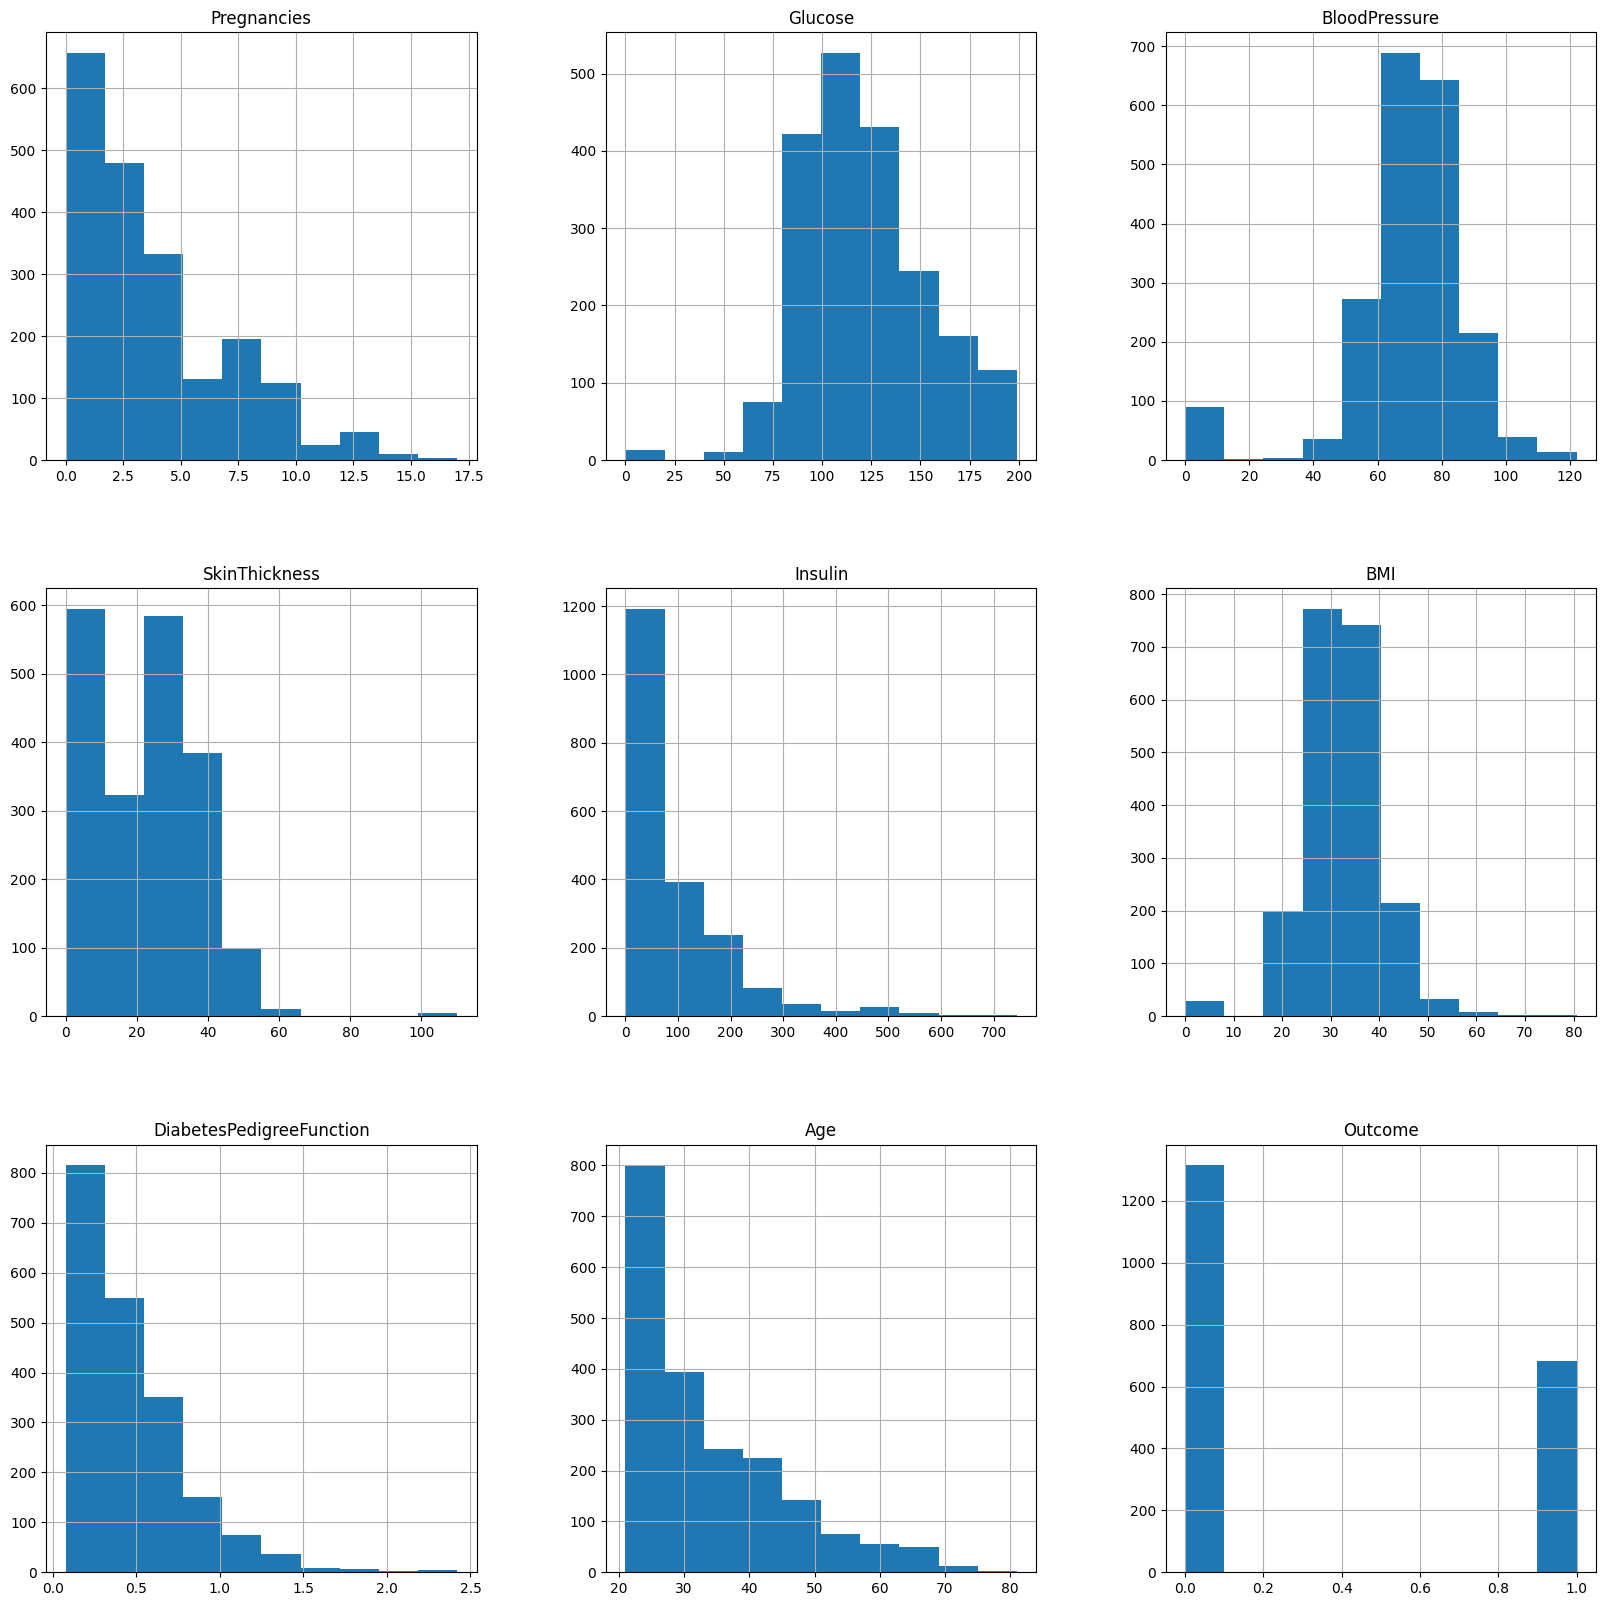

In [6]:
#Data visualization
#Plotting the data distribution plots before removing null values from our dataset
R=diabetes_data.hist(figsize=(20,20))

In [7]:
# Missing values handling using mean imputation
diabetes_data.fillna(diabetes_data.mean(), inplace=True)


In [8]:
#Verify if missing values are handled
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome
0    1316
1     684
Name: count, dtype: int64


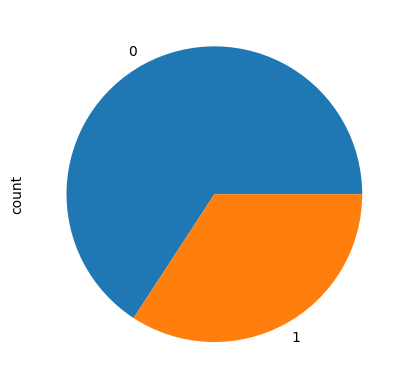

In [9]:
#check that how well our outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="pie")

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

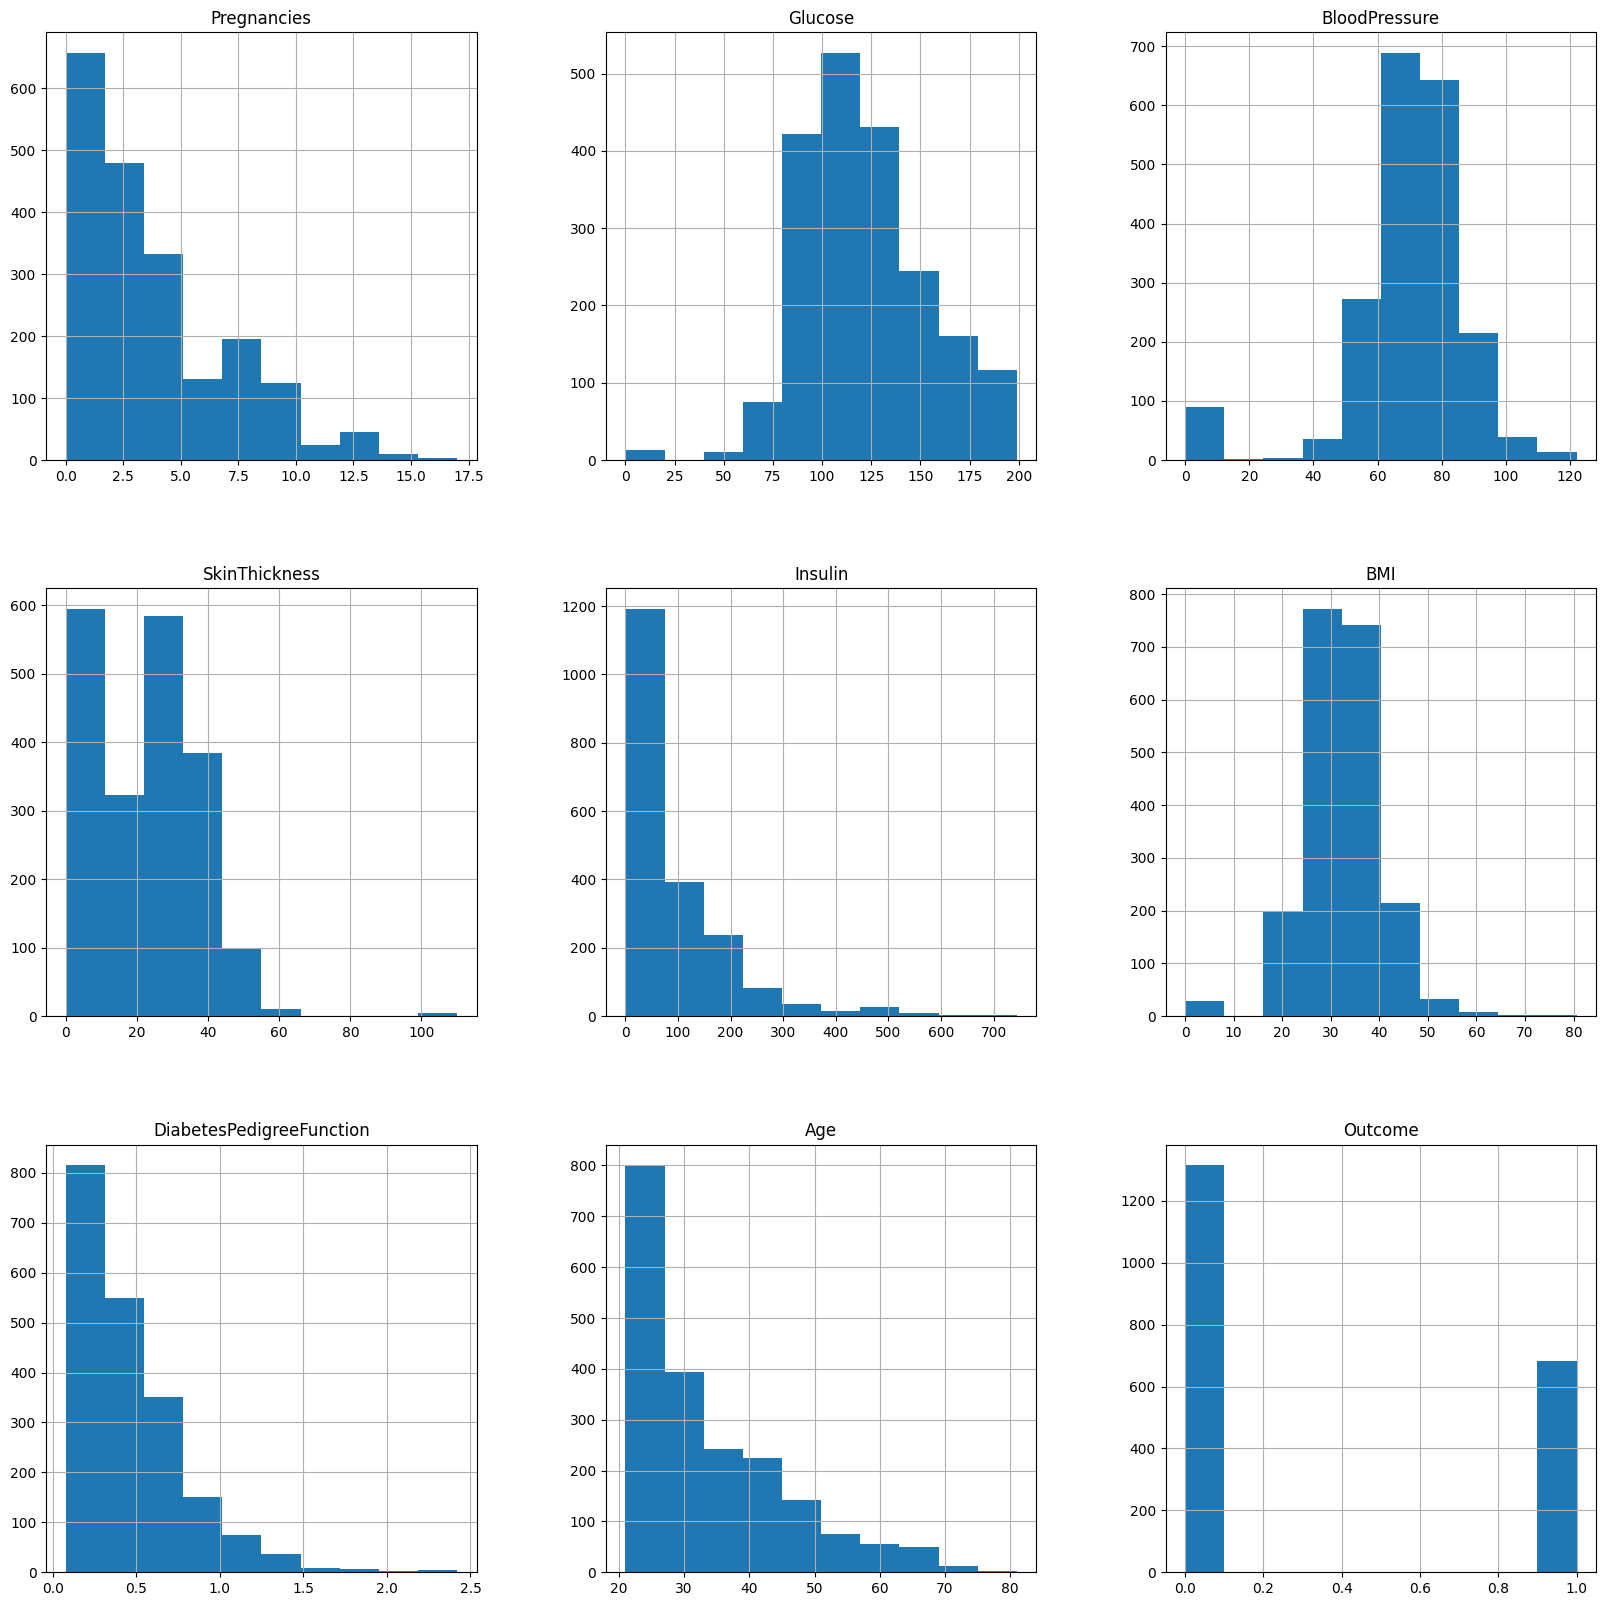

In [10]:
#Plotting the data distributions after handling the missing values
diabetes_data.hist(figsize=(20,20))

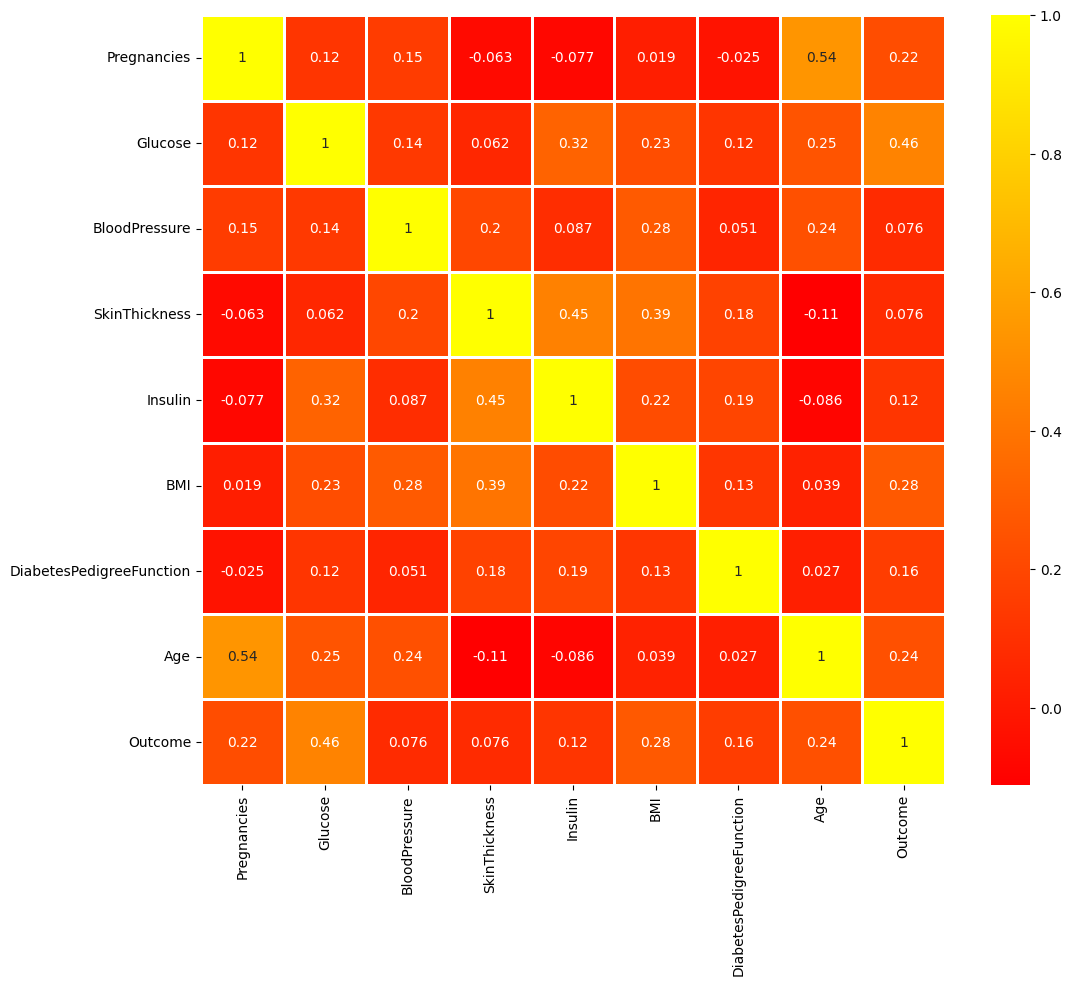

In [11]:
#Correlation between all the features in our dataset 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
#we will use seaborn as it has an easy method to showcase heatmap
R1 = sns.heatmap(diabetes_data.corr(), annot=True, linewidths=1, cmap='autumn')

In [12]:
# Now Scaling the data
from sklearn.preprocessing import StandardScaler
import numpy as np

diabetes_data_Copy = diabetes_data.copy(deep = True) # making a copy of the dataset
Sclr = StandardScaler()
diabetes_data_scalled =  pd.DataFrame(Sclr.fit_transform(diabetes_data_Copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
diabetes_data_scalled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.515394,0.524553,-0.372481,0.873645,-0.722016,0.172683,-1.063246,1.180424
1,-1.120495,-1.159756,0.670080,0.625186,0.402563,0.737249,-0.735551,-0.856326
2,-1.120495,0.742890,-3.604422,-1.300374,-0.722016,1.473638,0.491759,-0.177409
3,-1.120495,0.430980,-0.059713,1.308449,1.527142,1.240448,-0.327478,-0.771462
4,-0.817945,0.555744,-0.372481,1.246334,3.596367,1.044077,0.201161,-1.026055


In [13]:
#BUILDING MODEL 

from sklearn.model_selection import train_test_split

#splitting the dataset
fr=diabetes_data.drop(['Outcome'],axis=1)
ts=diabetes_data['Outcome']

#we will split the dataset into training and testing data using the train_test_split function
fr_train,fr_test,ts_train,ts_test=train_test_split(fr,ts,test_size=0.2,random_state=42)

# the MODEL EVALUATION
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
# Building the model using 'LOGISTICREGRESSION'

from sklearn.linear_model import LogisticRegression

# now Create a Logistic Regression model
lr = LogisticRegression(max_iter=1000)

#now Train the model
lr.fit(fr_train, ts_train)

# Make predictions on the test set
ts_Predl = lr.predict(fr_test)

# the Calculate evaluation metrics
accuracy = accuracy_score(ts_test, ts_Predl)
precision = precision_score(ts_test, ts_Predl)
recall = recall_score(ts_test, ts_Predl)
f1 = f1_score(ts_test, ts_Predl)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1 Score:", f1)

Accuracy: 0.795
Precision: 0.8037383177570093
Recall: 0.5850340136054422
f1 Score: 0.6771653543307086


In [15]:
# Building  model using 'DECISION TREE'
from sklearn.tree import DecisionTreeClassifier

# creating a decision tree model
Decision_tree=DecisionTreeClassifier()

# model training
Decision_tree.fit(fr_train,ts_train)

# Make predictions on the test set
ts_Pred2 = Decision_tree.predict(fr_test)

# Calculate evaluation metrics
accuracy = accuracy_score(ts_test, ts_Pred2)
precision = precision_score(ts_test, ts_Pred2)
recall = recall_score(ts_test, ts_Pred2)
f1 = f1_score(ts_test, ts_Pred2)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.98
Precision: 0.9483870967741935
Recall: 1.0
F1 Score: 0.9735099337748345


In [16]:
# now Building  model using 'RandomForest'
from sklearn.ensemble import RandomForestClassifier

#creating a RandomForest model
Random_forst=RandomForestClassifier(n_estimators=200)

# Train the model
Random_forst.fit(fr_train,ts_train)

# make prediction on the test set
ts_pred3=Random_forst.predict(fr_test)

# calculate evaluation matrices
accuracy = accuracy_score(ts_test, ts_pred3)
precision = precision_score(ts_test, ts_pred3)
recall = recall_score(ts_test, ts_pred3)
f1 = f1_score(ts_test, ts_pred3)

from sklearn import metrics
# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.985
Precision: 0.9862068965517241
Recall: 0.9727891156462585
F1 Score: 0.9794520547945206


In [17]:
# Building the model using 'Support Vector Machine'
from sklearn.svm import SVC

#creating a Support Vector Machine model
S_V_machine=SVC()

# Train the model
S_V_machine.fit(fr_train,ts_train)

# make prediction on the test set
ts_pred4=S_V_machine.predict(fr_test)

# calculate evaluation matrices
accuracy = accuracy_score(ts_test, ts_pred4)
precision = precision_score(ts_test, ts_pred4)
recall = recall_score(ts_test, ts_pred4)
f1 = f1_score(ts_test, ts_pred4)

from sklearn import metrics
# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.765
Precision: 0.7731958762886598
Recall: 0.5102040816326531
F1 Score: 0.6147540983606558


In [18]:
# Therefore DECISION TREE model is mostly accurate for this prediction
# model saving
import pickle

# using dump() function to save the model
save_mdl = pickle.dumps(Decision_tree)

# loading the saved model
ld_mdl=pickle.loads(save_mdl)

# let us make prediction
ld_mdl.predict(fr_test)

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,

<Axes: >

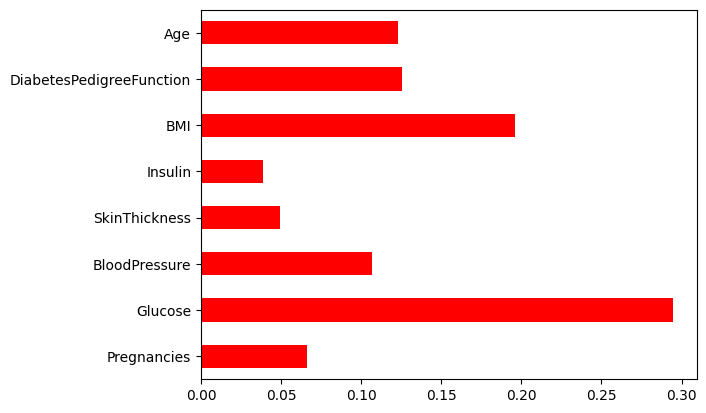

In [19]:

# Getting feature importances
Decision_tree.feature_importances_

# As it's a bit complicated to understanf from values, let us visualize the feature importance by plotting the it
(pd.Series(Decision_tree.feature_importances_, index=fr.columns).plot(kind='barh',color="red"))

In [20]:
#check our data set again
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [21]:
# check our dataset from the tail to make sure there is not any issue and our model is ready to give the right prediction
diabetes_data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1990,3,111,90,12,78,28.4,0.495,29,0
1991,6,102,82,0,0,30.8,0.180,36,1
1992,6,134,70,23,130,35.4,0.542,29,1
1993,2,87,0,23,0,28.9,0.773,25,0
1994,1,79,60,42,48,43.5,0.678,23,0
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [22]:
Decision_tree.predict([[9,170,74,31,0,44.0,0.403,43]])

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

Used libaries version: 
pandas 2.0.3, seaborn 0.12.2, matplotlib 3.7.2, numpy 1.25.1 .